# ANALISIS DEL JUGADOR DE LA SELECCION UNAB RUZI(ADC)🧀
# Especficamente con el uso del campeon Kai'sa
We start by showing the daaaaata :)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install statsmodels

In [3]:
!pip install wquantiles

In [4]:
import pandas as pd # Manipulacion y analisis de datos
import numpy as np # Calculos matematicos
import matplotlib.pyplot as plt
import seaborn as sns # Graficas bonitas
import scipy.stats as stats

In [5]:
from scipy.stats import trim_mean
from statsmodels import robust

In [6]:
daRoute = "/content/drive/MyDrive/Proyecto_CienciaDeDatos/dataset_ruzi_cienciadatos.csv"
df = pd.read_csv(daRoute) #Mostrar mi data set
df.head(25)

,champion,spell_1,spell_2,win / lose (1/0),durationG(min),cs,cs/min,first item,kills,deaths,assists,day_played
0,kai sa,flash,purification,0,29.12,157,5.39148,statik shyv,9,9,8,domingo
1,kai sa,flash,purification,0,42.09,253,6.01093,statik shyv,22,8,9,sabado
2,kai sa,flash,barrier,1,33.32,213,6.39256,statik shyv,20,4,18,viernes
3,kai sa,flash,purification,0,17.34,130,7.49712,statik shyv,2,7,8,viernes
4,kai sa,flash,purification,1,21.10,140,6.63507,kraken slayer,8,3,6,jueves
5,kai sa,flash,barrier,0,24.25,159,6.55670,statik shyv,4,1,1,miercoles
6,kai sa,flash,purification,0,34.12,223,6.53576,kraken slayer,12,7,7,martes
7,kai sa,flash,barrier,1,27.34,227,8.30285,kraken slayer,13,4,8,jueves
8,kai sa,flash,heal,0,26.59,211,7.93531,kraken slayer,11,6,2,martes
9,kai sa,flash,purification,0,31.27,194,6.20403,statik shyv,12,7,6,martes


In [7]:
df.info() # Muestra informacion de mi data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   champion          25 non-null     object 
 1   spell_1           25 non-null     object 
 2   spell_2           25 non-null     object 
 3   win / lose (1/0)  25 non-null     int64  
 4   durationG(min)    25 non-null     float64
 5   cs                25 non-null     int64  
 6   cs/min            25 non-null     float64
 7   first item        25 non-null     object 
 8   kills             25 non-null     int64  
 9   deaths            25 non-null     int64  
 10  assists           25 non-null     int64  
 11  day_played        25 non-null     object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.5+ KB


In [8]:
df.describe() # Muestra estadisticas de mi data set

,win / lose (1/0),durationG(min),cs,cs/min,kills,deaths,assists
count,25.0,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,0.4,27.862000,193.760000,7.048745,10.880000,5.080000,6.440000
std,0.5,5.687948,38.517615,1.141785,5.035871,2.289833,3.536477
min,0.0,17.290000,130.000000,5.391480,2.000000,0.000000,1.000000
25%,0.0,24.250000,166.000000,6.010930,8.000000,4.000000,4.000000
50%,0.0,27.510000,194.000000,7.147320,11.000000,5.000000,6.000000
75%,1.0,31.270000,223.000000,7.935310,13.000000,7.000000,8.000000
max,1.0,42.090000,256.000000,9.600930,22.000000,9.000000,18.000000


In [9]:
print(f'This has {len(df.columns)} categories:')
stra = ''
howManyBySide = 6
for i in range(len(df.columns)):
  stra += df.columns[i] + ', '
  if (i + 1) % howManyBySide == 0:
    stra += '\n'
print(stra)

This has 12 categories:
champion, spell_1, spell_2, win / lose (1/0), durationG(min), cs, 
cs/min, first item, kills, deaths, assists, day_played, 



In [10]:
print(f'this dataset has {df.shape[1]} columns and {df.shape[0]} rows') # Mostramos cantidad de filas y columnas

this dataset has 12 columns and 25 rows


In [11]:
winRate = df['win / lose (1/0)'].value_counts()
winRate # Cuento especificamente la cantidad de victorias y derrotas  (0 = derrota; 1 = victoria)

,count
win / lose (1/0),
0,15
1,10


In [12]:
wR= (winRate[1] / winRate.sum()) * 100 # Con esto estoy calculando el porcentaje de victorias
print(f'Porcentaje de victorias: {wR:.2f}%')

Porcentaje de victorias: 40.00%


In [13]:
dR= (winRate[0] / winRate.sum()) * 100 # Con esto estoy calculando el porcentaje de victorias
print(f'Porcentaje de derrotas: {dR:.2f}%')

Porcentaje de derrotas: 60.00%


In [14]:
df['KDA'] = (df['kills'] + df['assists']) / df['deaths'].replace(0, 1)  # Reemplaza 0 en deaths con un 1
print(df[['kills', 'deaths', 'assists', 'KDA']]) #Muestro el KDA


    kills  deaths  assists        KDA
0       9       9        8   1.888889
1      22       8        9   3.875000
2      20       4       18   9.500000
3       2       7        8   1.428571
4       8       3        6   4.666667
5       4       1        1   5.000000
6      12       7        7   2.714286
7      13       4        8   5.250000
8      11       6        2   2.166667
9      12       7        6   2.571429
10      9       7        6   2.142857
11      6       1        4  10.000000
12      6       4        6   3.000000
13      8       0        3  11.000000
14     19       8        7   3.250000
15     15       5       12   5.400000
16     10       5        4   2.800000
17     12       5       10   4.400000
18     16       6        4   3.333333
19      2       6        5   1.166667
20     13       7        3   2.285714
21     12       5        6   3.600000
22     10       5        5   3.000000
23     11       3        9   6.666667
24     10       4        4   3.500000


In [15]:
np.average(df['KDA'], weights=df['KDA']) #Media ponderada del KDA
#

5.752536740170792

Text(0, 0.5, 'KDA')

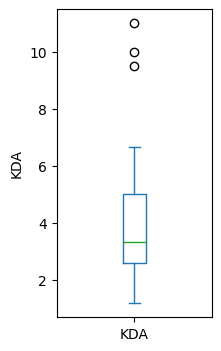

In [92]:
#Dibujando diagramas de caja de kda
ax = (df['KDA']).plot.box(figsize=(2,4))
ax.set_ylabel("KDA")

In [93]:
# Calculando la tabla de frecuencias de KDA
binned_KDA = pd.cut(df["KDA"], 10)  # Agrupar en 10 intervalos
frequency_counts = binned_KDA.value_counts()  # Contar las frecuencias

print(frequency_counts)

KDA
(2.15, 3.133]      7
(3.133, 4.117]     5
(1.157, 2.15]      4
(4.117, 5.1]       3
(5.1, 6.083]       2
(9.033, 10.017]    2
(6.083, 7.067]     1
(10.017, 11.0]     1
(7.067, 8.05]      0
(8.05, 9.033]      0
Name: count, dtype: int64


Text(0, 0.5, 'KDA')

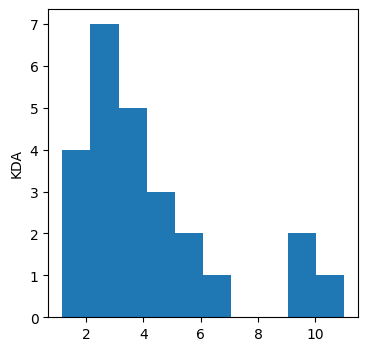

In [103]:
#Histograma de kda
ax = (df.KDA).plot.hist(figsize=(4,4))
ax.set_ylabel("KDA")

Text(0.5, 0, 'KDA')

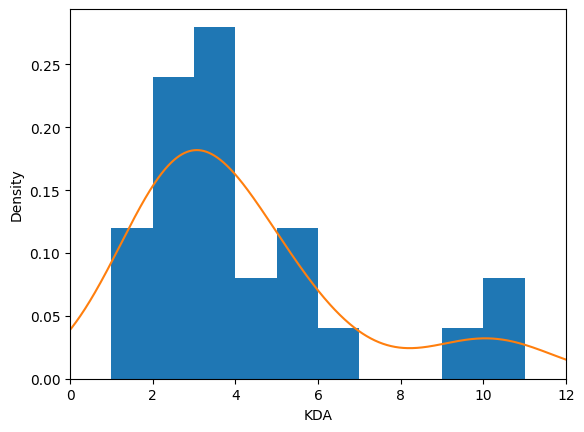

In [104]:
#Diagrama de dispersión y curva de densidad de KDA
ax=df["KDA"].plot.hist(density=True,xlim=[0,12],bins=range(1,12))
df["KDA"].plot.density(ax=ax)
ax.set_xlabel("KDA")

In [16]:
kda_by_result = df.groupby('win / lose (1/0)')['KDA'].agg(['mean', 'median', 'min', 'max']) #Estoy sacando el promedio (mean) y la mediana (median)
print(kda_by_result)

                      mean    median       min   max
win / lose (1/0)                                    
0                 2.796005  2.714286  1.166667   5.0
1                 6.266667  5.325000  3.250000  11.0


In [17]:
df['kills'].mean() #Promedio de kills


10.88

In [33]:
trim_mean(df.kills,0.1) #quiero contar el 10% de los datos

10.761904761904763

In [36]:
df['kills'].median() #Mediana de kills

11.0

In [18]:
np.average(df['kills'], weights=df['kills']) # Promedio ponderado de kills

13.117647058823529

In [65]:
# Calcular la desviación estándar de kills
desviacion_estandar_kills = df['kills'].std()
print(f'Desviación Estándar de Kills: {desviacion_estandar_kills:.2f}')

Desviación Estándar de Kills: 5.04


In [63]:
#Calculando IQR de kills
IQR_kills = df.kills.quantile(0.75)-df.kills.quantile(0.25)
print(f'IQR de kills: {IQR_kills:.2f}')

IQR de kills: 5.00


In [57]:
# Calcular MAD de kills (desviación absoluta mediana de la mediana)
mad_kills = robust.scale.mad(df["kills"])
print(f'MAD de Kills: {mad_kills:.2f}')

MAD de Kills: 2.97


In [75]:
#Calculando percentiles de kills
df["kills"].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

,kills
0.05,2.4
0.25,8.0
0.50,11.0
0.75,13.0
0.95,19.8


Text(0, 0.5, 'kills')

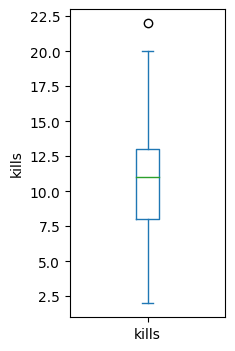

In [84]:
#Dibujando diagramas de caja de kills
ax = (df['kills']).plot.box(figsize=(2,4))
ax.set_ylabel("kills")

In [91]:
# Calculando la tabla de frecuencias de kills
binned_kills = pd.cut(df["kills"], 10)  # Agrupar en 10 intervalos
frequency_counts = binned_kills.value_counts()  # Contar las frecuencias

print(frequency_counts)

kills
(10.0, 12.0]    6
(8.0, 10.0]     5
(1.98, 4.0]     3
(4.0, 6.0]      2
(6.0, 8.0]      2
(12.0, 14.0]    2
(14.0, 16.0]    2
(18.0, 20.0]    2
(20.0, 22.0]    1
(16.0, 18.0]    0
Name: count, dtype: int64


Text(0, 0.5, 'Kills')

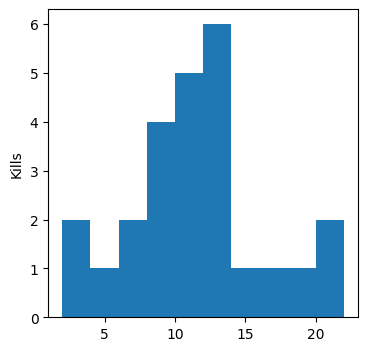

In [97]:
#Histograma de kills
ax = (df.kills).plot.hist(figsize=(4,4))
ax.set_ylabel("Kills")

Text(0.5, 0, 'Kills')

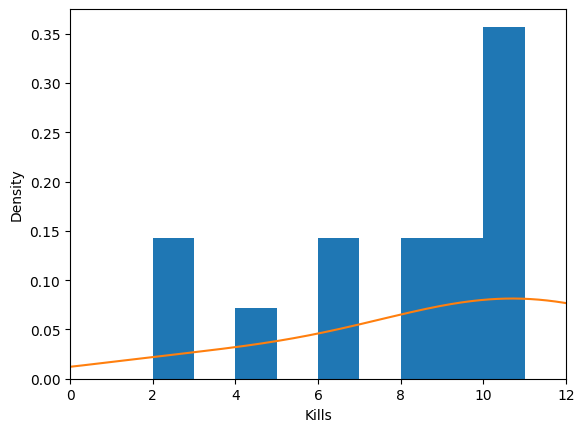

In [98]:
#Diagrama de dispersión y curva de densidad de kills
ax=df["kills"].plot.hist(density=True,xlim=[0,12],bins=range(1,12))
df["kills"].plot.density(ax=ax)
ax.set_xlabel("Kills")

In [19]:
df['deaths'].mean() #Promedio de muertes

5.08

In [34]:
trim_mean(df.deaths,0.1) #quiero contar el 10% de los datos

5.190476190476191

In [37]:
df['deaths'].median() #Mediana de muertes

5.0

In [20]:
np.average(df['deaths'], weights=df['deaths']) #Promedio ponderado de muertes
#

6.070866141732283

In [66]:
# Calcular la desviación estándar de muertes
desviacion_estandar_deaths = df['deaths'].std()
print(f'Desviación Estándar de muertes: {desviacion_estandar_deaths:.2f}')

Desviación Estándar de muertes: 2.29


In [64]:
#Calculando IQR de muertes
IQR_deaths = df.deaths.quantile(0.75)-df.deaths.quantile(0.25)
print(f'IQR de muertes: {IQR_deaths:.2f}')

IQR de muertes: 3.00


In [58]:
# Calcular MAD de muertes (desviación absoluta mediana de la mediana)
mad_deaths = robust.scale.mad(df["deaths"])
print(f'MAD de muertes: {mad_deaths:.2f}')

MAD de muertes: 2.97


In [76]:
#Calculando percentiles de muertes
df["deaths"].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

,deaths
0.05,1.0
0.25,4.0
0.50,5.0
0.75,7.0
0.95,8.0


Text(0, 0.5, 'muertes')

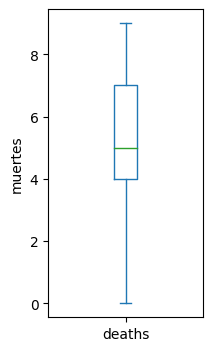

In [83]:
#Dibujando diagramas de caja de muertes
ax = (df['deaths']).plot.box(figsize=(2,4))
ax.set_ylabel("muertes")

In [90]:
# Calculando la tabla de frecuencias de muertes
binned_deaths = pd.cut(df["deaths"], 10)  # Agrupar en 10 intervalos
frequency_counts = binned_deaths.value_counts()  # Contar las frecuencias

print(frequency_counts)

deaths
(4.5, 5.4]       5
(6.3, 7.2]       5
(3.6, 4.5]       4
(5.4, 6.3]       3
(0.9, 1.8]       2
(2.7, 3.6]       2
(7.2, 8.1]       2
(-0.009, 0.9]    1
(8.1, 9.0]       1
(1.8, 2.7]       0
Name: count, dtype: int64


Text(0, 0.5, 'muertes')

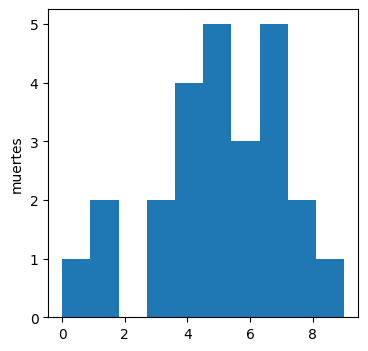

In [99]:
#Histograma de muertes
ax = (df.deaths).plot.hist(figsize=(4,4))
ax.set_ylabel("muertes")

Text(0.5, 0, 'muertes')

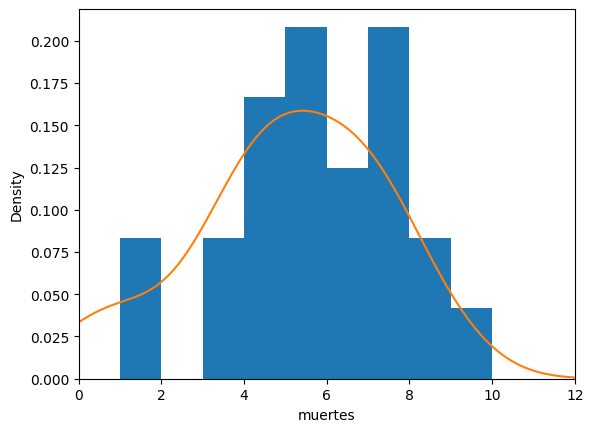

In [100]:
#Diagrama de dispersión y curva de densidad de muertes
ax=df["deaths"].plot.hist(density=True,xlim=[0,12],bins=range(1,12))
df["deaths"].plot.density(ax=ax)
ax.set_xlabel("muertes")

In [21]:
df['assists'].mean() #Promedio de asistencias

6.44

In [35]:
trim_mean(df.assists,0.1) #quiero contar el 10% de los datos

6.095238095238095

In [39]:
df['assists'].median() #Mediana de asistencias

6.0

In [22]:
np.average(df['assists'], weights=df['assists']) #Promedio ponderado de asistencias

8.304347826086957

In [67]:
# Calcular la desviación estándar de asistencias
desviacion_estandar_assists = df['assists'].std()
print(f'Desviación Estándar de asistencias: {desviacion_estandar_assists:.2f}')

Desviación Estándar de asistencias: 3.54


In [61]:
#Calculando IQR de asistencias
IQR_assists = df.assists.quantile(0.75)-df.assists.quantile(0.25)
print(f'IQR de asistencias: {IQR_assists:.2f}')

IQR de asistencias: 4.00


In [59]:
# Calcular MAD de asistencias (desviación absoluta mediana de la mediana)
mad_assists = robust.scale.mad(df["assists"])
print(f'MAD de asistencias: {mad_assists:.2f}')

MAD de asistencias: 2.97


In [77]:
#Calculando percentiles de asistencias
df["assists"].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

,assists
0.05,2.2
0.25,4.0
0.50,6.0
0.75,8.0
0.95,11.6


Text(0, 0.5, 'assists')

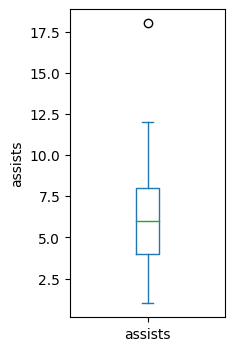

In [82]:
#Dibujando diagramas de caja de asistencias
ax = (df['assists']).plot.box(figsize=(2,4))
ax.set_ylabel("assists")

In [89]:
# Calculando la tabla de frecuencias de asistencias
binned_assists = pd.cut(df["assists"], 10)  # Agrupar en 10 intervalos
frequency_counts = binned_assists.value_counts()  # Contar las frecuencias

print(frequency_counts)

assists
(4.4, 6.1]      7
(2.7, 4.4]      6
(7.8, 9.5]      5
(0.983, 2.7]    2
(6.1, 7.8]      2
(9.5, 11.2]     1
(11.2, 12.9]    1
(16.3, 18.0]    1
(12.9, 14.6]    0
(14.6, 16.3]    0
Name: count, dtype: int64


Text(0, 0.5, 'asistencias')

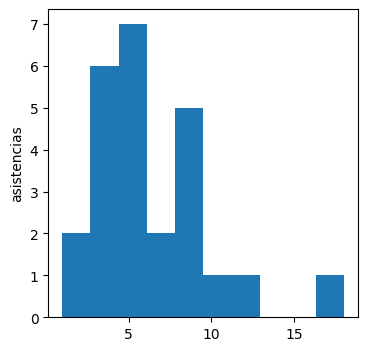

In [101]:
#Histograma de asistencias
ax = (df.assists).plot.hist(figsize=(4,4))
ax.set_ylabel("asistencias")

Text(0.5, 0, 'asistencias')

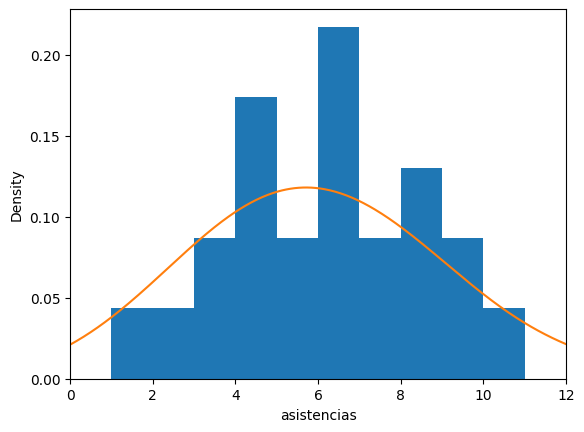

In [102]:
#Diagrama de dispersión y curva de densidad de asistencias
ax=df["assists"].plot.hist(density=True,xlim=[0,12],bins=range(1,12))
df["assists"].plot.density(ax=ax)
ax.set_xlabel("asistencias")

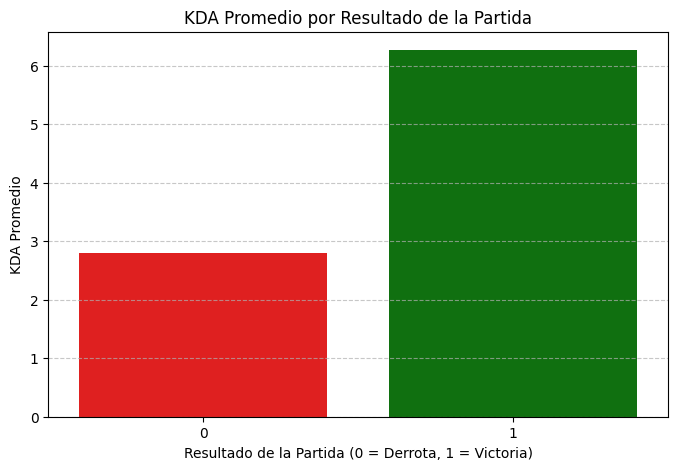

In [23]:
# Grafico usando seaborn
plt.figure(figsize=(8, 5)) # Establece el tamaño de la figura a 8 pulgadas de ancho y 5 pulgadas de alto
sns.barplot(data=df, x='win / lose (1/0)', y='KDA', hue='win / lose (1/0)', palette=['red', 'green'], errorbar=None, legend=False)# Coloco en X win/lose en Y kda
# Hue usa la misma columna para el color de las barras, diferenciando entre victorias y derrotas; palette define los colores para las barras (rojo para derrotas y verde para victorias)
plt.xlabel('Resultado de la Partida (0 = Derrota, 1 = Victoria)')
plt.ylabel('KDA Promedio')
plt.title('KDA Promedio por Resultado de la Partida')
plt.xticks(rotation=0)  # Estable la rotacion de las etiquetas del eje X de manera horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7) # Añade una cuadrícula horizontal con líneas discontinuas y un 70% de opacidad
plt.show()

In [24]:
# Agrupar el DataFrame por el resultado de la partida (win_lose) y calcular las estadísticas de CS para cada grupo
cs_by_result = df.groupby('win / lose (1/0)')['cs'].agg(['mean', 'median', 'min', 'max'])
print(cs_by_result)

                   mean  median  min  max
win / lose (1/0)                         
0                 195.4   194.0  130  256
1                 191.3   188.0  140  229


In [41]:
#FUNCION PARA HALLAR PROMEDIO PONDERADO DEL CS
def weighted_average(group):
    return np.average(group['cs'], weights=group['cs'])

# Aplicar la función al grupo
weighted_cs_by_result = df.groupby('win / lose (1/0)').apply(weighted_average).reset_index(name='weighted_average_cs')

print(weighted_cs_by_result)

   win / lose (1/0)  weighted_average_cs
0                 0           204.712044
1                 1           195.592786


In [52]:
# Calcular la desviación estándar de cs
desviacion_estandar = df['cs'].std()
print(f'Desviación Estándar de cs: {desviacion_estandar:.2f}')

Desviación Estándar de cs: 38.52


In [68]:
#Calculando IQR de CS
IQR_cs = df.cs.quantile(0.75)-df.cs.quantile(0.25)
print(f'IQR de cs: {IQR_cs:.2f}')

IQR de cs: 57.00


In [69]:
# Calcular MAD de cs (desviación absoluta mediana de la mediana)
mad_cs = robust.scale.mad(df["cs"])
print(f'MAD de cs: {mad_cs:.2f}')

MAD de cs: 43.00


In [78]:
#Calculando percentiles de cs
df["cs"].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

,cs
0.05,132.0
0.25,166.0
0.50,194.0
0.75,223.0
0.95,252.2


Text(0, 0.5, 'cs')

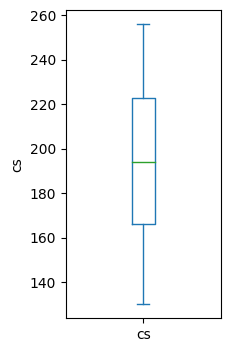

In [81]:
#Dibujando diagramas de caja de cs
ax = (df['cs']).plot.box(figsize=(2,4))
ax.set_ylabel("cs")

In [88]:
# Calculando la tabla de frecuencias de cs
binned_cs = pd.cut(df["cs"], 10)  # Agrupar en 10 intervalos
frequency_counts = binned_cs.value_counts()  # Contar las frecuencias

print(frequency_counts)

cs
(155.2, 167.8]      4
(193.0, 205.6]      4
(218.2, 230.8]      4
(243.4, 256.0]      4
(129.874, 142.6]    3
(167.8, 180.4]      2
(205.6, 218.2]      2
(142.6, 155.2]      1
(180.4, 193.0]      1
(230.8, 243.4]      0
Name: count, dtype: int64


Text(0, 0.5, 'cs')

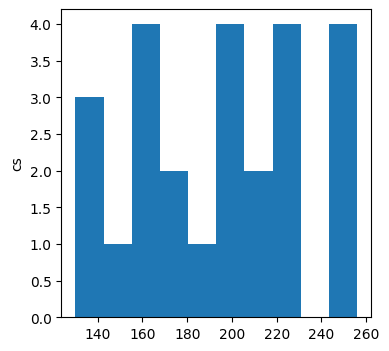

In [105]:
#Histograma de CS
ax = (df.cs).plot.hist(figsize=(4,4))
ax.set_ylabel("cs")

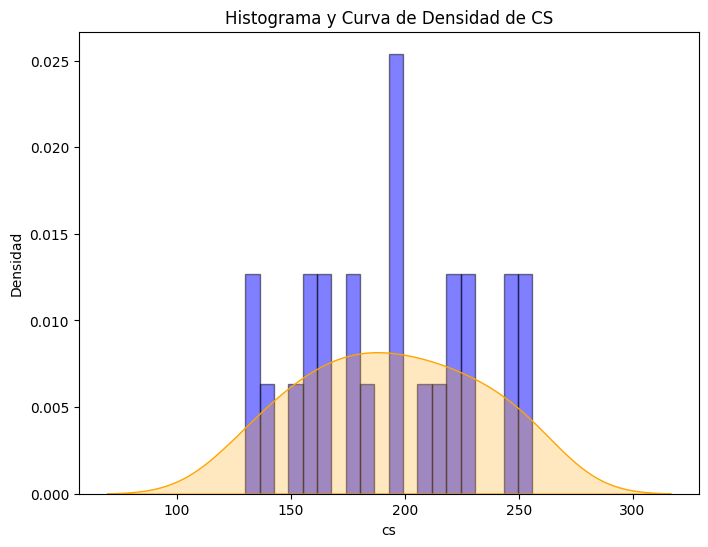

In [121]:
#Diagrama de dispersión y curva de densidad de asistencias
fig, ax = plt.subplots(figsize=(8, 6))
# Histograma de 'cs'
ax.hist(df['cs'], bins=20, density=True, alpha=0.5, color='blue', edgecolor='black')
# Curva de densidad de 'cs'
sns.kdeplot(df['cs'], ax=ax, fill=True, color='orange')
# Configuración del gráfico
ax.set_xlabel('cs')
ax.set_ylabel('Densidad')
ax.set_title('Histograma y Curva de Densidad de CS')
# Mostrar el gráfico
plt.show()

In [25]:
# Calcular CS por minuto
df['cs/min'] = df['cs'] / df['durationG(min)']
# Crear una nueva columna para indicar si la partida se ganó o perdió
df['win_lose'] = df['win / lose (1/0)']
# Agrupar el DataFrame por el resultado de la partida (win_lose) y calcular las estadísticas de CS por minuto para cada grupo
csmin_by_result = df.groupby('win_lose')['cs/min'].agg(['mean', 'median', 'min', 'max'])
# Imprimir los resultados
print(csmin_by_result)

              mean    median       min       max
win_lose                                        
0         6.868141  6.556701  5.391484  9.067642
1         7.319651  7.188512  5.857488  9.600925


In [43]:
#FUNCION PARA HALLAR PROMEDIO PONDERADO DEL CS/MIN
def weighted_average(group):
    return np.average(group['cs/min'], weights=group['cs/min'])

# Aplicar la función al grupo
weighted_cs_min_by_result = df.groupby('win / lose (1/0)').apply(weighted_average).reset_index(name='weighted_average_cs/min')

print(weighted_cs_min_by_result)

   win / lose (1/0)  weighted_average_cs/min
0                 0                 7.031665
1                 1                 7.500239


In [70]:
# Calcular la desviación estándar de cs/min
desviacion_estandar_cs_min = df['cs/min'].std()
print(f'Desviación Estándar de cs/min: {desviacion_estandar_cs_min:.2f}')

Desviación Estándar de cs/min: 1.14


In [74]:
#Calculando IQR de CS/min
IQR_cs_min = df['cs/min'].quantile(0.75)-df['cs/min'].quantile(0.25)
print(f'IQR de cs/min: {IQR_cs_min:.2f}')

IQR de cs/min: 1.92


In [72]:
# Calcular MAD de cs/min (desviación absoluta mediana de la mediana)
mad_cs_min = robust.scale.mad(df["cs/min"])
print(f'MAD de cs/min: {mad_cs_min:.2f}')

MAD de cs/min: 1.40


In [79]:
#Calculando percentiles de cs/min
df["cs/min"].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

,cs/min
0.05,5.631181
0.25,6.010929
0.50,7.147316
0.75,7.935314
0.95,8.949502


Text(0, 0.5, 'cs/min')

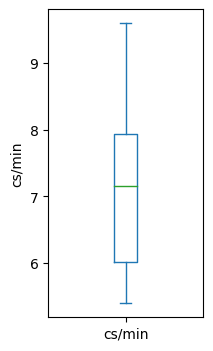

In [80]:
#Dibujando diagramas de caja de cs/min
ax = (df['cs/min']).plot.box(figsize=(2,4))
ax.set_ylabel("cs/min")

In [87]:
# Calculando la tabla de frecuencias de cs/min
binned_cs_min = pd.cut(df["cs/min"], 10)  # Agrupar en 10 intervalos
frequency_counts = binned_cs_min.value_counts()  # Contar las frecuencias

print(frequency_counts)

cs/min
(5.812, 6.233]    5
(6.233, 6.654]    4
(7.075, 7.496]    4
(7.917, 8.338]    4
(5.387, 5.812]    3
(7.496, 7.917]    2
(8.338, 8.759]    1
(8.759, 9.18]     1
(9.18, 9.601]     1
(6.654, 7.075]    0
Name: count, dtype: int64


Text(0, 0.5, 'cs/min')

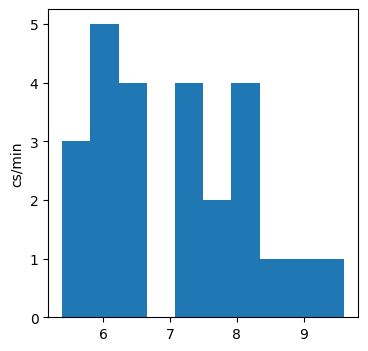

In [116]:
#Histograma de CS/min
ax = (df['cs/min']).plot.hist(figsize=(4,4))
ax.set_ylabel("cs/min")

Text(0.5, 0, 'cs/min')

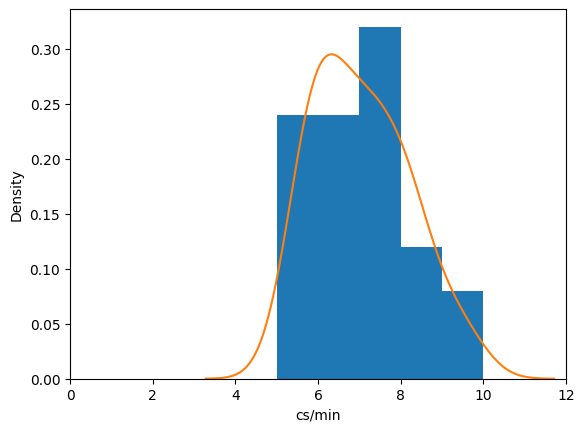

In [117]:
#Diagrama de dispersión y curva de densidad de cs/min
ax=df["cs/min"].plot.hist(density=True,xlim=[0,12],bins=range(1,12))
df["cs/min"].plot.density(ax=ax)
ax.set_xlabel("cs/min")

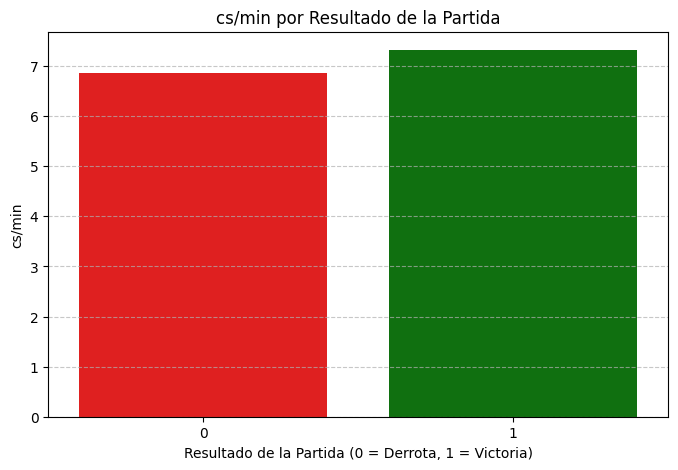

In [26]:
# Grafico usando seaborn
plt.figure(figsize=(8, 5)) # Establece el tamaño de la figura a 8 pulgadas de ancho y 5 pulgadas de alto
sns.barplot(data=df, x='win / lose (1/0)', y='cs/min', hue='win / lose (1/0)', palette=['red', 'green'], errorbar=None, legend=False)# Coloco en X win/lose en Y kda
# Hue usa la misma columna para el color de las barras, diferenciando entre victorias y derrotas; palette define los colores para las barras (rojo para derrotas y verde para victorias)
plt.xlabel('Resultado de la Partida (0 = Derrota, 1 = Victoria)')
plt.ylabel('cs/min')
plt.title('cs/min por Resultado de la Partida')
plt.xticks(rotation=0)  # Estable la rotacion de las etiquetas del eje X de manera horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7) # Añade una cuadrícula horizontal con líneas discontinuas y un 70% de opacidad
plt.show()

In [27]:
item1 = df['first item'].value_counts()
item1 # Cuento especificamente la cantidad de veces que se jugo con cada primer objeto

,count
first item,
kraken slayer,13
statik shyv,12


In [28]:
# Contar las victorias y derrotas para cada objeto
item_counts = df.groupby(['first item', 'win / lose (1/0)']).size().unstack(fill_value=0)
# Renombrar las columnas para mayor claridad
item_counts.columns = ['Derrotas', 'Victorias']
# Imprimir los resultados
print(item_counts)
# Calcular la tasa de victorias para cada objeto
item_counts['Tasa de Victorias (%)'] = (item_counts['Victorias'] / (item_counts['Victorias'] + item_counts['Derrotas'])) * 100
# Imprimir la tasa de victorias
print(item_counts[['Victorias', 'Derrotas', 'Tasa de Victorias (%)']])

               Derrotas  Victorias
first item                        
kraken slayer         7          6
statik shyv           8          4
               Victorias  Derrotas  Tasa de Victorias (%)
first item                                               
kraken slayer          6         7              46.153846
statik shyv            4         8              33.333333


<Figure size 1000x600 with 0 Axes>

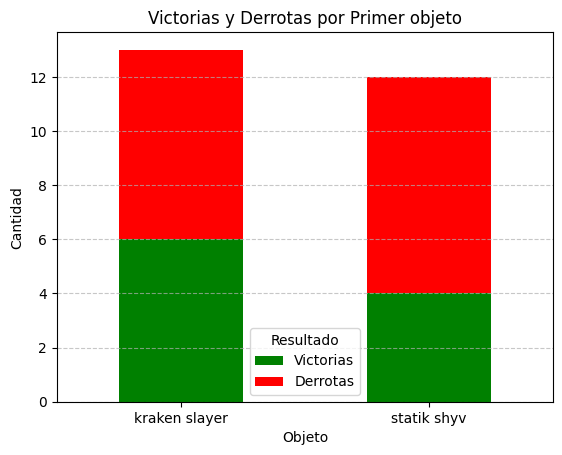

In [29]:
# Graficar
plt.figure(figsize=(10, 6))
item_counts[['Victorias', 'Derrotas']].plot(kind='bar', stacked=True, color=['green', 'red'])

# Personalizar el gráfico
plt.title('Victorias y Derrotas por Primer objeto')
plt.xlabel('Objeto')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)  # Rotar las etiquetas del eje x
plt.legend(title='Resultado', labels=['Victorias', 'Derrotas'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()

In [30]:
day = df['day_played'].value_counts()
day # Cuento especificamente la cantidad de veces que se jugo segun el dia de la semana

,count
day_played,
martes,9
domingo,5
viernes,5
jueves,4
sabado,1
miercoles,1


In [31]:
# Contar las victorias y derrotas para cada objeto
day_counts = df.groupby(['day_played', 'win / lose (1/0)']).size().unstack(fill_value=0)
# Renombrar las columnas para mayor claridad
day_counts.columns = ['Derrotas', 'Victorias']
# Imprimir los resultados
print(day_counts)
# Calcular la tasa de victorias para cada objeto
day_counts['Tasa de Victorias (%)'] = (day_counts['Victorias'] / (day_counts['Victorias'] + day_counts['Derrotas'])) * 100
# Imprimir la tasa de victorias
print(day_counts[['Victorias', 'Derrotas', 'Tasa de Victorias (%)']])

            Derrotas  Victorias
day_played                     
domingo            3          2
jueves             1          3
martes             6          3
miercoles          1          0
sabado             1          0
viernes            3          2
            Victorias  Derrotas  Tasa de Victorias (%)
day_played                                            
domingo             2         3              40.000000
jueves              3         1              75.000000
martes              3         6              33.333333
miercoles           0         1               0.000000
sabado              0         1               0.000000
viernes             2         3              40.000000


<Figure size 1000x600 with 0 Axes>

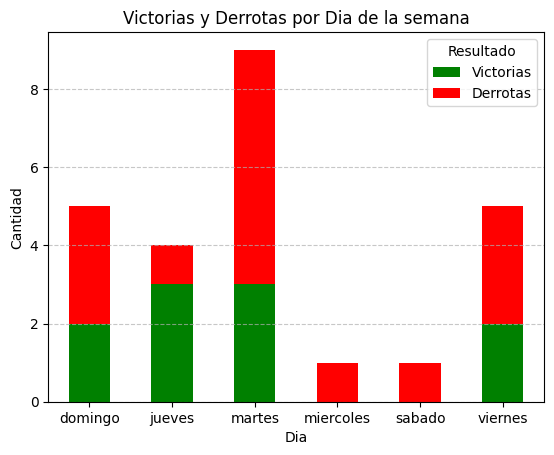

In [32]:
# Graficar
plt.figure(figsize=(10, 6))
day_counts[['Victorias', 'Derrotas']].plot(kind='bar', stacked=True, color=['green', 'red'])

# Personalizar el gráfico
plt.title('Victorias y Derrotas por Dia de la semana')
plt.xlabel('Dia')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)  # Rotar las etiquetas del eje x
plt.legend(title='Resultado', labels=['Victorias', 'Derrotas'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()

### Sobre Estimaciones de variabilidad

1. **Qué significa que la desviación estándar es casi dos veces mayor que la MAD?**

Que la desviación estándar sea casi dos veces mayor que la desviación media absoluta (MAD) significa que hay una gran dispersión en los datos. La desviación estándar es sensible a valores extremos, por lo que si hay algunos valores muy alejados de la media, esto hará que la desviación estándar sea significativamente mayor que la MAD. La MAD es más robusta a valores atípicos.

2. **Cómo puedo mejorar esta situación?**

Para mejorar la situación y reducir la diferencia entre la desviación estándar y la MAD, se pueden tomar varias medidas:

- Identificar y eliminar valores atípicos reales en los datos, si los hay. Algunos valores extremos pueden deberse a errores de medición o entrada de datos.

- Transformar los datos, por ejemplo aplicando logaritmos, para reducir el efecto de valores muy altos. Esto puede disminuir la dispersión general.

- Utilizar medidas de tendencia central más robustas como la mediana en lugar de la media. La mediana es menos sensible a valores atípicos.

- Calcular el rango intercuartílico (IQR) en lugar de la desviación estándar. El IQR se basa en los cuartiles y es más resistente a valores extremos.

3. **Explique el resultado obtenido al calcular IQR**

El rango intercuartílico (IQR) es la diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1). Representa la dispersión de la mitad central de los datos, eliminando el 25% más alto y el 25% más bajo.

Un IQR grande indica que hay una dispersión considerable en la mitad central de los datos. Aproximadamente el 50% de los valores se encuentran dentro del rango Q1 a Q3.

El IQR es una medida robusta de dispersión porque no se ve afectado por valores atípicos en los extremos. A diferencia del rango, que se extiende desde el valor mínimo hasta el máximo, el IQR se enfoca en la variabilidad de la parte central de la distribución.




### Sobre exploración en distribución de datos

1. **Qué información nos suministra los percentiles de tasa de homicidios por estados?**

Percentil 5 (P5): 1.600
Esto significa que el 5% de los estados tiene una tasa de homicidios menor o igual a 1.600. Este valor representa un límite bajo en la distribución, indicando que hay pocos estados con tasas tan bajas.

Percentil 25 (P25): 2.425
El 25% de los estados tiene una tasa de homicidios menor o igual a 2.425. Esto indica que un cuarto de los estados se encuentra en el rango más bajo de tasas de homicidio.

Mediana (P50): 4.000
La mediana indica que el 50% de los estados tiene una tasa de homicidios menor o igual a 4.000. Este es un valor central que divide la distribución en dos mitades iguales.

Percentil 75 (P75): 5.550
El 75% de los estados tiene una tasa de homicidios menor o igual a 5.550. Esto significa que un cuarto de los estados tiene tasas más altas que este valor, indicando una concentración en el extremo superior.

Percentil 95 (P95): 6.510
Esto indica que el 95% de los estados tiene una tasa de homicidios menor o igual a 6.510, lo que sugiere que solo un pequeño porcentaje (5%) tiene tasas significativamente más altas.

2. **Explique con sus propias palabras qué información suministra el diagrama de caja con respecto a la tasa de homicidios por estado.**

Mediana (Q2)
Si la mediana es aproximadamente 4, esto indica que el 50% de los estados tienen tasas de homicidio menores o iguales a este valor.

Primer Cuartil (Q1)
Si Q1 es aproximadamente 2, esto significa que un cuarto de los estados tiene tasas de homicidio por debajo de este nivel.

Tercer Cuartil (Q3)
 Si Q3 es aproximadamente 5, esto significa que solo el 25% superior tiene tasas más altas.

Rango Intercuartílico (IQR)
Un IQR de aproximadamente 3 sugiere una variabilidad considerable en las tasas; algunos estados tienen tasas significativamente más altas o más bajas.

Valores Atípicos
Los estados con tasas por encima de aproximadamente 7 serían considerados valores atípicos y podrían incluir a estados como Louisiana (10,3) y Mississippi (8,6).
Estos valores atípicos indican que hay estados con problemas significativos en términos de violencia y criminalidad.

3. **Cómo podría agregarse los estados que se encuentran en cada uno de los intervalos? Si no sabe la respuesta, complete la tabla de forma manual y postee su respuesta. Interprete los resultados obtenidos.**

df = pd.DataFrame(data)

# Definir los cuartiles
Q1 = df['Murder.Rate'].quantile(0.25)
Q3 = df['Murder.Rate'].quantile(0.75)

# Definir los intervalos
def classify_rate(rate):
    if rate <= Q1:
        return "Bajo"
    elif Q1 < rate <= Q3:
        return "Medio"
    else:
        return "Alto"

# Clasificar los estados en intervalos
df['Intervalo'] = df['Murder.Rate'].apply(classify_rate)

# Mostrar el DataFrame con los intervalos
print(df[['State', 'Murder.Rate', 'Intervalo']])

Interpretacion de los resultados:

Distribución de las Tasas de Homicidio:
La mayoría de los estados (28) se clasifican en la categoría "Medio", lo que indica que tienen tasas de homicidio que son moderadas en comparación con el resto del conjunto de datos.

Un número significativo de estados (15) se clasifica como "Bajo", lo que sugiere que estos estados tienen tasas de homicidio relativamente bajas.
Por otro lado, hay un número considerable de estados (7) clasificados como "Alto", lo que indica que tienen tasas de homicidio más preocupantes.

Valores Extremos:
Louisiana tiene la tasa más alta (10.3), lo que la coloca claramente en la categoría "Alto". Esto puede indicar problemas significativos de violencia y criminalidad en ese estado.
Algunos estados como New Hampshire (0.9) y Maine (1.6) tienen tasas muy bajas, lo que sugiere un entorno más seguro en comparación con otros estados.

4. **Explique el resultado obtenido por el diagrama de dispersión**

 Relación entre Población y Tasa de Homicidios
Al graficar la tasa de homicidios y la población, se puede observar cómo se distribuyen los puntos (cada punto representa un estado)
No se espera que haya una relación lineal clara entre la población y la tasa de homicidios algunos estados con poblaciones altas pueden tener tasas de homicidio relativamente bajas, mientras que otros con poblaciones más pequeñas pueden tener tasas de homicidio muy altas. Esto sugiere que la tasa de homicidio no necesariamente aumenta con la población.

Fuerza de la Relación
La fuerza de la relación se puede evaluar observando cuán cerca están los puntos de una línea imaginaria.
En este caso, los puntos estan bastante dispersos, lo que sugiere que no hay una relación fuerte entre el tamaño de la población y las tasas de homicidio.

 Valores Atípicos
Los valores atípicos son aquellos que se alejan significativamente del patrón general observado en el diagrama.En este conjunto de datos, Louisiana (con una tasa de homicidio de 10.3) y Mississippi (8.6) son ejemplos claros de valores atípicos, ya que tienen tasas significativamente más altas que otros estados, independientemente de su población.

Tendencias y Patrones
En este caso, no hay una tendencia clara. Los datos pueden mostrar un patrón más disperso sin una dirección definida, lo que indica que factores distintos a la población pueden estar influyendo en las tasas de homicidio.

